In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 111.7 MB/s eta 0:00:00


In [3]:
!ls drive/MyDrive/earth_engine/*.nc

drive/MyDrive/earth_engine/dynamic_world_built_2015_2024.nc
drive/MyDrive/earth_engine/dynamic_world_built_2015.nc
drive/MyDrive/earth_engine/dynamic_world_built_albuquerque.nc
drive/MyDrive/earth_engine/dynamic_world_built_austin.nc
drive/MyDrive/earth_engine/dynamic_world_built_columbus.nc
drive/MyDrive/earth_engine/dynamic_world_built_Delhi.nc
drive/MyDrive/earth_engine/dynamic_world_built_Dubai.nc
drive/MyDrive/earth_engine/dynamic_world_built_HongKong.nc
drive/MyDrive/earth_engine/dynamic_world_built_kansas_city.nc
drive/MyDrive/earth_engine/dynamic_world_built_Las_Vegas.nc
drive/MyDrive/earth_engine/dynamic_world_built_London.nc
drive/MyDrive/earth_engine/dynamic_world_built_Melbourne.nc
drive/MyDrive/earth_engine/dynamic_world_built_minneapolis.nc
drive/MyDrive/earth_engine/dynamic_world_built_portland.nc
drive/MyDrive/earth_engine/dynamic_world_built_seattle.nc
drive/MyDrive/earth_engine/dynamic_world_built_washington_DC.nc
drive/MyDrive/earth_engine/dynamic_world_flooded_veget

In [4]:
import xarray as xr
!git clone https://github.com/manmeet3591/CYGNSS

Cloning into 'CYGNSS'...
remote: Enumerating objects: 426, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 426 (delta 132), reused 120 (delta 115), pack-reused 266 (from 1)
Receiving objects: 100% (426/426), 231.17 MiB | 16.64 MiB/s, done.
Resolving deltas: 100% (386/386), done.
Updating files: 100% (402/402), done.


In [5]:
import xarray as xr

vars = ['SM_daily', 'latitude', 'longitude']

ds_cygnss = xr.open_mfdataset('CYGNSS/data2022/ucar_cu_cygnss_sm_v1_2022_???.dap.nc')[vars].compute()
ds_cygnss

<ipython-input-5-76345fb9ad44>:5: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds_cygnss = xr.open_mfdataset('CYGNSS/data2022/ucar_cu_cygnss_sm_v1_2022_???.dap.nc')[vars].compute()
<ipython-input-5-76345fb9ad44>:5: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds_cygnss = xr.open_mfdataset('CYGNSS/data2022/ucar_cu_cygnss_sm_v1_2022_???.dap.nc')[vars].compute()
<ipython-input-5-76345fb9ad44>:5: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds_cygnss = xr.open_mfdataset('CYGNSS/data2022/ucar_cu_cygnss_sm_v1_2022_???.dap.nc')[vars].co

<xarray.Dataset> Size: 873MB
Dimensions:    (time: 360, lat: 252, lon: 802)
Coordinates:
  * time       (time) datetime64[ns] 3kB 2022-01-01T12:00:00 ... 2022-12-29T1...
Dimensions without coordinates: lat, lon
Data variables:
    SM_daily   (time, lat, lon) float32 291MB nan nan nan nan ... nan nan nan
    latitude   (time, lat, lon) float32 291MB -38.14 -38.14 ... 38.14 38.14
    longitude  (time, lat, lon) float32 291MB -135.0 -134.6 ... 163.8 164.1
Attributes: (12/45)
    source:                              ucar_cu_cygnss_sm_v1_2022_001.nc
    id:                                  PODAAC-CYGNU-L3SM1
    ShortName:                           CYGNSS_L3_SOIL_MOISTURE_V1.0
    title:                               CYGNSS Level 3 Soil Moisture from UC...
    summary:                             The CYGNSS Level 3 Soil Moisture Pro...
    comment:                             Dataset created by UCAR and CU Boulder
    ...                                  ...
    build_dmrpp_metadata.build_dmrpp:    3.20.9-91
    build_dmrpp_metadata.bes:            3.20.9-91
    build_dmrpp_metadata.libdap:         libdap-3.20.8-41
    build_dmrpp_metadata.configuration:  \n# TheBESKeys::get_as_config()\nAll...
    build_dmrpp_metadata.invocation:     build_dmrpp -c /tmp/conf_Jpyz -f /tm...
    history_json:                        [{"$schema":"https:\/\/harmony.earth...

In [6]:
# Adding latitude and longitude as 1D coordinates
lat_data = ds_cygnss['latitude'].isel(time=0, lon=0).values
lon_data = ds_cygnss['longitude'].isel(time=0, lat=0).values

ds_cygnss_ = ds_cygnss.assign_coords(lat=lat_data, lon=lon_data)
ds_cygnss_

<xarray.Dataset> Size: 873MB
Dimensions:    (time: 360, lat: 252, lon: 802)
Coordinates:
  * time       (time) datetime64[ns] 3kB 2022-01-01T12:00:00 ... 2022-12-29T1...
  * lat        (lat) float32 1kB -38.14 -37.79 -37.43 ... 37.43 37.79 38.14
  * lon        (lon) float32 3kB -135.0 -134.6 -134.3 ... 163.4 163.8 164.1
Data variables:
    SM_daily   (time, lat, lon) float32 291MB nan nan nan nan ... nan nan nan
    latitude   (time, lat, lon) float32 291MB -38.14 -38.14 ... 38.14 38.14
    longitude  (time, lat, lon) float32 291MB -135.0 -134.6 ... 163.8 164.1
Attributes: (12/45)
    source:                              ucar_cu_cygnss_sm_v1_2022_001.nc
    id:                                  PODAAC-CYGNU-L3SM1
    ShortName:                           CYGNSS_L3_SOIL_MOISTURE_V1.0
    title:                               CYGNSS Level 3 Soil Moisture from UC...
    summary:                             The CYGNSS Level 3 Soil Moisture Pro...
    comment:                             Dataset created by UCAR and CU Boulder
    ...                                  ...
    build_dmrpp_metadata.build_dmrpp:    3.20.9-91
    build_dmrpp_metadata.bes:            3.20.9-91
    build_dmrpp_metadata.libdap:         libdap-3.20.8-41
    build_dmrpp_metadata.configuration:  \n# TheBESKeys::get_as_config()\nAll...
    build_dmrpp_metadata.invocation:     build_dmrpp -c /tmp/conf_Jpyz -f /tm...
    history_json:                        [{"$schema":"https:\/\/harmony.earth...

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


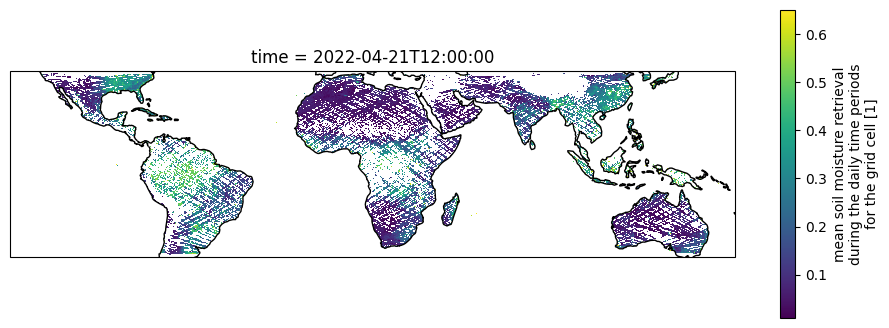

In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig,ax = plt.subplots(ncols=1,nrows=1, figsize=(11.69,4), subplot_kw={'projection': ccrs.PlateCarree()})
ds_cygnss_.SM_daily.isel(time=110).plot(ax=ax, cmap='viridis')
ax.coastlines()
plt.savefig('fig1_gaps.png', dpi=500)

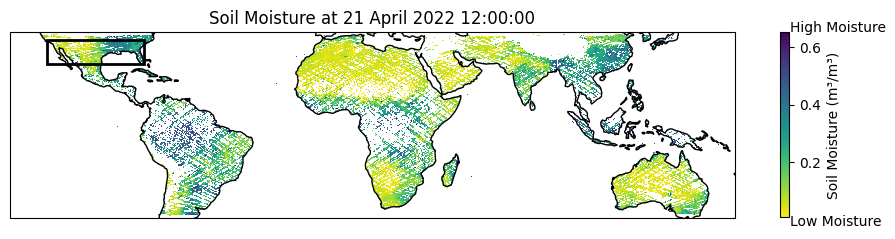

In [8]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Rectangle

# Create the plot with Cartopy projection
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(11.69, 4), subplot_kw={'projection': ccrs.PlateCarree()})
sm_plot = ds_cygnss_.SM_daily.isel(time=110).plot(ax=ax, cmap='viridis_r', cbar_kwargs={'shrink': 0.6, 'label': 'Soil Moisture (m³/m³)'})

# Add coastlines
ax.coastlines()

# Add title
ax.set_title('Soil Moisture at 21 April 2022 12:00:00')

# Add black box (lat = slice(25, 35), lon = slice(-120, -90))
lon_min, lon_max = -120, -80
lat_min, lat_max = 25, 35

# Create a Rectangle for the box (black border, no fill)
box = Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min,
                linewidth=2, edgecolor='black', facecolor='none', transform=ccrs.PlateCarree())

# Add the rectangle to the plot
ax.add_patch(box)

# Modify colorbar and add text
cbar = sm_plot.colorbar
cbar.set_label('Soil Moisture (m³/m³)', fontsize=10)
cbar.ax.text(1.05, 0.5, 'High Moisture\n\n\n\n\n\n\n\n\n\n\n\nLow Moisture', transform=cbar.ax.transAxes, va='center')

# Save the figure
plt.savefig('fig1_gaps_1.png', dpi=500)

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


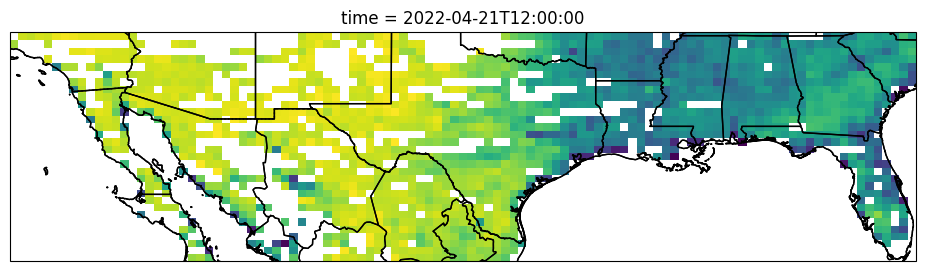

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(11.69, 8), subplot_kw={'projection': ccrs.PlateCarree()})
sm_plot = ds_cygnss_.SM_daily.isel(time=110).sel(lat=slice(25,35)).sel(lon=slice(-120,-80)).plot(ax=ax, cmap='viridis_r', add_colorbar=False)

ax.coastlines()
ax.add_feature(cfeature.STATES.with_scale('10m'))  # Add state borders
ax.add_feature(cfeature.BORDERS, linestyle=':')
# ax.set_title('Soil Moisture at 21 April 2022 12:00:00')

# # Adding text on the colorbar (near its label)
# cbar = sm_plot.colorbar
# cbar.set_label('Soil Moisture (m³/m³)', fontsize=10)
# cbar.ax.text(1.05, 0.5, 'High Moisture\n\n\n\n\n\n\n\n\n\n\n\nLow Moisture', transform=cbar.ax.transAxes, va='center')

plt.savefig('fig1_gaps_2.png', dpi=500)

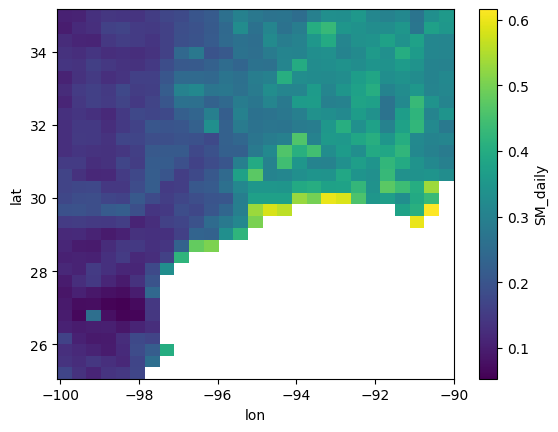

In [10]:
ds_cygnss_.sel(lat=slice(25,35)).sel(lon=slice(-100,-90)).SM_daily.mean(dim='time').plot()

In [11]:
ds_cygnss_tx = ds_cygnss_.sel(lat=slice(25,35)).sel(lon=slice(-100,-90)).SM_daily
ds_cygnss_tx = ds_cygnss_.SM_daily
ds_cygnss_tx.shape

(360, 252, 802)

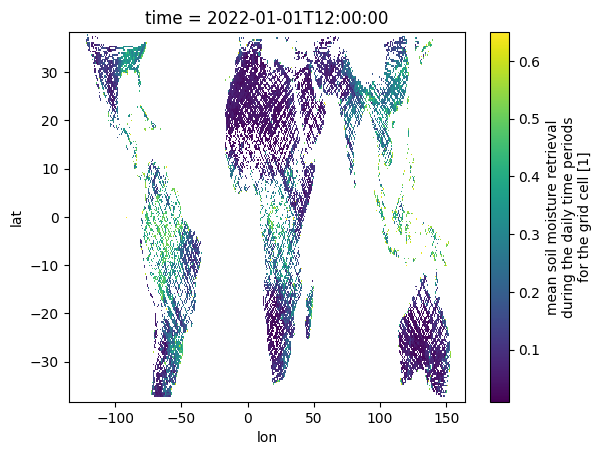

In [12]:
ds_cygnss_tx.isel(time=0).plot()

# Make sub images

Original slice shape: (360, 252, 802)
Sliced data shape: (360, 248, 800)
Sub-images shape: (3100, 8, 8)
Recreated image shape: (248, 800)


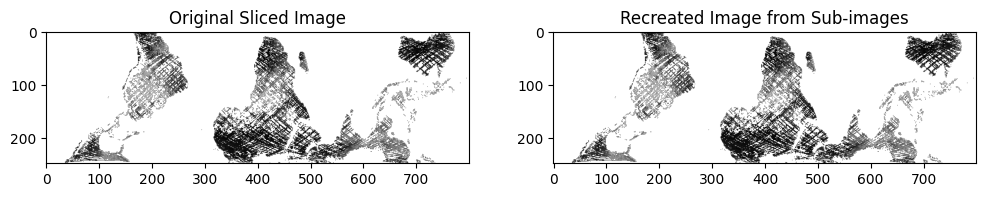

In [13]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from skimage.util import view_as_blocks

def slice_data_for_blocks(data, block_size=(64, 64)):
    """
    Slice the data to ensure dimensions are divisible by the block size.

    Parameters:
    data (xarray.DataArray): The original data array.
    block_size (tuple): The size of the blocks (sub-images).

    Returns:
    xarray.DataArray: The sliced data array.
    tuple: The shape of the cropped data array.
    """
    lat_size, lon_size = data.shape[-2], data.shape[-1]
    lat_new = (lat_size // block_size[0]) * block_size[0]
    lon_new = (lon_size // block_size[1]) * block_size[1]
    data_sliced = data.isel(lat=slice(0, lat_new), lon=slice(0, lon_new))
    return data_sliced, (lat_new, lon_new)

def generate_sub_images(data, block_size=(64, 64)):
    """
    Generate sub-images of the specified block size from the original image.

    Parameters:
    data (numpy array): The original image array of shape (H, W).
    block_size (tuple): The size of the blocks (sub-images) to generate.

    Returns:
    numpy array: An array of sub-images.
    """
    H, W = data.shape
    blocks = view_as_blocks(data, block_shape=block_size)
    sub_images = blocks.reshape(-1, *block_size)
    return sub_images

def recreate_image_from_sub_images(sub_images, original_shape, block_size=(64, 64)):
    """
    Recreate the original image from sub-images.

    Parameters:
    sub_images (numpy array): An array of sub-images.
    original_shape (tuple): The shape of the cropped image (H, W).
    block_size (tuple): The size of the blocks (sub-images) used.

    Returns:
    numpy array: The recreated original image.
    """
    H, W = original_shape
    h_blocks = H // block_size[0]
    w_blocks = W // block_size[1]
    sub_images = sub_images.reshape(h_blocks, w_blocks, *block_size)
    recreated_image = np.block([[sub_images[i, j] for j in range(w_blocks)] for i in range(h_blocks)])
    return recreated_image

# Ensure data dimensions are divisible by block size
data_sliced, cropped_shape = slice_data_for_blocks(ds_cygnss_tx, block_size=(8, 8))

# Generate sub-images
sub_images = generate_sub_images(data_sliced[0,:,:].values, block_size=(8, 8))



# Recreate the original image
recreated_image = recreate_image_from_sub_images(sub_images, cropped_shape, block_size=(8, 8))

print(f"Original slice shape: {ds_cygnss_tx.shape}")
print(f"Sliced data shape: {data_sliced.shape}")
print(f"Sub-images shape: {sub_images.shape}")
print(f"Recreated image shape: {recreated_image.shape}")

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(data_sliced[0,:,:], cmap='gray')
ax[0].set_title('Original Sliced Image')

ax[1].imshow(recreated_image, cmap='gray')
ax[1].set_title('Recreated Image from Sub-images')

plt.show()

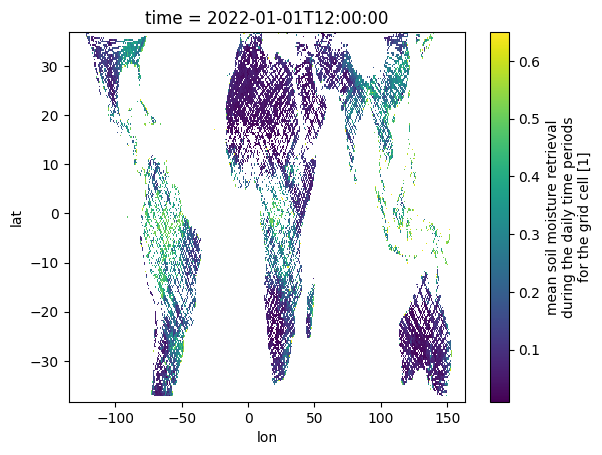

In [14]:
data_sliced.isel(time=0).plot()

Original slice shape: (360, 252, 802)
Sliced data shape: (360, 248, 800)
Sub-images shape: (3100, 8, 8)
Recreated image shape: (248, 800)


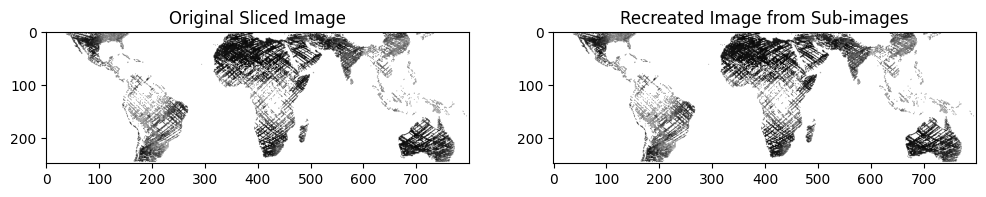

In [15]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from skimage.util import view_as_blocks

def slice_data_for_blocks(data, block_size=(64, 64)):
    """
    Slice the data to ensure dimensions are divisible by the block size.

    Parameters:
    data (xarray.DataArray): The original data array.
    block_size (tuple): The size of the blocks (sub-images).

    Returns:
    xarray.DataArray: The sliced data array.
    tuple: The shape of the cropped data array.
    """
    lat_size, lon_size = data.shape[-2], data.shape[-1]
    lat_new = (lat_size // block_size[0]) * block_size[0]
    lon_new = (lon_size // block_size[1]) * block_size[1]
    data_sliced = data.isel(lat=slice(0, lat_new), lon=slice(0, lon_new))
    return data_sliced, (lat_new, lon_new)

def generate_sub_images(data, block_size=(64, 64)):
    """
    Generate sub-images of the specified block size from the original image.

    Parameters:
    data (numpy array): The original image array of shape (H, W).
    block_size (tuple): The size of the blocks (sub-images) to generate.

    Returns:
    numpy array: An array of sub-images.
    """
    H, W = data.shape
    blocks = view_as_blocks(data, block_shape=block_size)
    sub_images = blocks.reshape(-1, *block_size)
    return sub_images

def recreate_image_from_sub_images(sub_images, original_shape, block_size=(64, 64)):
    """
    Recreate the original image from sub-images.

    Parameters:
    sub_images (numpy array): An array of sub-images.
    original_shape (tuple): The shape of the cropped image (H, W).
    block_size (tuple): The size of the blocks (sub-images) used.

    Returns:
    numpy array: The recreated original image.
    """
    H, W = original_shape
    h_blocks = H // block_size[0]
    w_blocks = W // block_size[1]
    sub_images = sub_images.reshape(h_blocks, w_blocks, *block_size)
    recreated_image = np.block([[sub_images[i, j] for j in range(w_blocks)] for i in range(h_blocks)])
    return recreated_image

def visualize_sub_images(sub_images, block_size=(64, 64), ncols=8):
    """
    Visualize the sub-images.

    Parameters:
    sub_images (numpy array): An array of sub-images.
    block_size (tuple): The size of the blocks (sub-images).
    ncols (int): The number of columns for visualization.
    """
    nrows = int(np.ceil(len(sub_images) / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(11, 8))
    for ax, sub_image in zip(axes.flat, sub_images):
        ax.imshow(sub_image, cmap='gray')
        ax.axis('off')
    for ax in axes.flat[len(sub_images):]:
        ax.axis('off')
    plt.savefig('sub_images_before_training.png', dpi=500)

data_array = ds_cygnss_tx #ds_combined.isel(time=times_to_isel).Band1
# Select a specific time slice
data_slice = ds_cygnss_tx #data_array.sel(time=data_array.time[0])

# Ensure data dimensions are divisible by block size
data_sliced, cropped_shape = slice_data_for_blocks(data_slice, block_size=(8, 8))

# Convert to numpy and flip along vertical axis to correct orientation
data_sliced_np = np.flipud(data_sliced.values)

# Generate sub-images
sub_images = generate_sub_images(data_sliced_np[0,:,:], block_size=(8, 8))

# Recreate the original image
recreated_image = recreate_image_from_sub_images(sub_images, cropped_shape, block_size=(8, 8))

# Flip the recreated image back to the original orientation
recreated_image = np.flipud(recreated_image)

print(f"Original slice shape: {data_slice.shape}")
print(f"Sliced data shape: {data_sliced.shape}")
print(f"Sub-images shape: {sub_images.shape}")
print(f"Recreated image shape: {recreated_image.shape}")

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(np.flipud(data_sliced_np[0,:,:]), cmap='gray')
ax[0].set_title('Original Sliced Image')

ax[1].imshow(recreated_image, cmap='gray')
ax[1].set_title('Recreated Image from Sub-images')

plt.show()

# # Visualize sub-images
# visualize_sub_images(sub_images, block_size=(64, 64), ncols=8)

In [16]:
def remove_nan_sub_images(sub_images):
    """
    Remove sub-images that contain NaN values.

    Parameters:
    sub_images (numpy array): An array of sub-images.

    Returns:
    numpy array: Filtered array of sub-images without NaN values.
    """
    mask = ~np.isnan(sub_images).any(axis=(1, 2))
    return sub_images[mask]

# Assuming ds_combined is already loaded and times_to_isel is defined
data_array = ds_cygnss_tx # ds_combined.isel(time=times_to_isel).Band1

# Process each time slice
all_sub_images = []
for time in data_array.time:
    data_slice = data_array.sel(time=time)

    # Ensure data dimensions are divisible by block size
    data_sliced, cropped_shape = slice_data_for_blocks(data_slice, block_size=(8, 8))

    # Convert to numpy and flip along vertical axis to correct orientation
    data_sliced_np = np.flipud(data_sliced.values)

    # Generate sub-images
    sub_images = generate_sub_images(data_sliced_np, block_size=(8, 8))

    # Remove sub-images with NaN values
    sub_images = remove_nan_sub_images(sub_images)

    all_sub_images.append(sub_images)

# Combine all sub-images into a single array for visualization if needed
all_sub_images = np.concatenate(all_sub_images, axis=0)

In [17]:
print(all_sub_images.shape, np.min(all_sub_images), np.max(all_sub_images))

(1178, 8, 8) 0.010150299 0.60524344


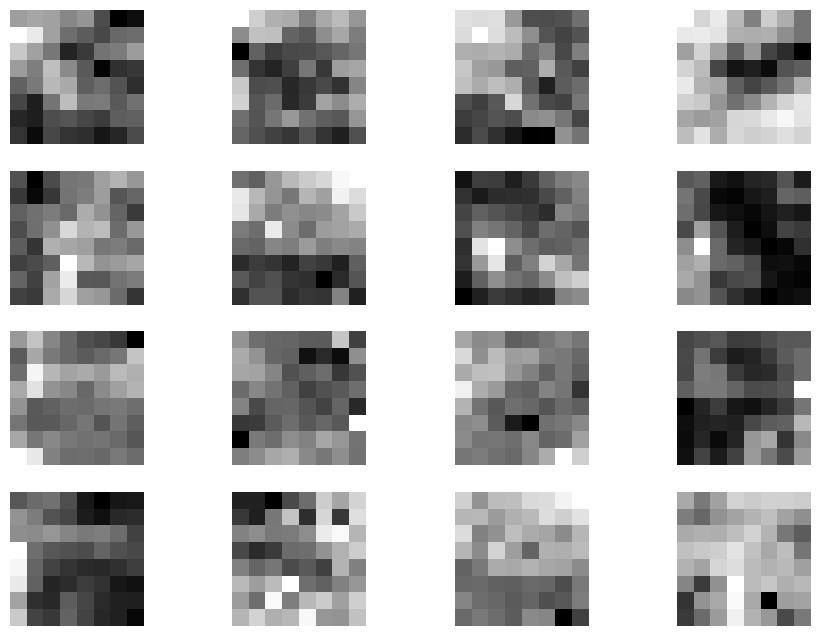

In [18]:
# Visualize sub-images
visualize_sub_images(all_sub_images[:16], block_size=(4, 4), ncols=4)

In [19]:
!mv sub_images_before_training.png fig2_sub_images_without_nans.png

# Gap Filling Starts

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Define the U-Net architecture
class UNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()

        def conv_block(in_channels, out_channels):
            block = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
                nn.ReLU(inplace=True),
                nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
                nn.ReLU(inplace=True)
            )
            return block

        self.encoder1 = conv_block(in_channels, 64)
        self.encoder2 = conv_block(64, 128)
        self.encoder3 = conv_block(128, 256)
        self.encoder4 = conv_block(256, 512)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.middle = conv_block(512, 1024)

        self.upconv4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.decoder4 = conv_block(1024, 512)
        self.upconv3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.decoder3 = conv_block(512, 256)
        self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.decoder2 = conv_block(256, 128)
        self.upconv1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.decoder1 = conv_block(128, 64)

        self.final_conv = nn.Conv2d(64, out_channels, kernel_size=1)

    def forward(self, x):
        enc1 = self.encoder1(x)
        enc2 = self.encoder2(self.pool(enc1))
        enc3 = self.encoder3(self.pool(enc2))
        enc4 = self.encoder4(self.pool(enc3))

        middle = self.middle(self.pool(enc4))

        dec4 = self.upconv4(middle)
        dec4 = torch.cat((dec4, enc4), dim=1)
        dec4 = self.decoder4(dec4)

        dec3 = self.upconv3(dec4)
        dec3 = torch.cat((dec3, enc3), dim=1)
        dec3 = self.decoder3(dec3)

        dec2 = self.upconv2(dec3)
        dec2 = torch.cat((dec2, enc2), dim=1)
        dec2 = self.decoder2(dec2)

        dec1 = self.upconv1(dec2)
        dec1 = torch.cat((dec1, enc1), dim=1)
        dec1 = self.decoder1(dec1)

        out = self.final_conv(dec1)
        return out

class FSRCNN(nn.Module):
    def __init__(self, d=56, s=12, m=4, upscale_factor=1):
        super(FSRCNN, self).__init__()
        self.first_part = nn.Sequential(
            nn.Conv2d(2, d, kernel_size=5, padding=5//2),
            nn.PReLU(d)
        )

        self.mid_parts = [nn.Sequential(
            nn.Conv2d(d, s, kernel_size=1),
            nn.PReLU(s)
        )]

        for _ in range(m - 1):
            self.mid_parts.append(nn.Sequential(
                nn.Conv2d(s, s, kernel_size=3, padding=3//2),
                nn.PReLU(s)
            ))

        self.mid_parts = nn.Sequential(*self.mid_parts)

        self.last_part = nn.Sequential(
            nn.Conv2d(s, d, kernel_size=1),
            nn.PReLU(d),
            nn.ConvTranspose2d(d, 1, kernel_size=9, stride=upscale_factor, padding=9//2, output_padding=upscale_factor-1)
        )

    def forward(self, x):
        x = self.first_part(x)
        x = self.mid_parts(x)
        x = self.last_part(x)
        return x

In [22]:
# Define the custom dataset
class CYGNSSDataset(Dataset):
    def __init__(self, incomplete_data, complete_data, transform=None):
        self.incomplete_data = incomplete_data
        self.complete_data = complete_data
        self.transform = transform

    def __len__(self):
        return len(self.incomplete_data)

    def __getitem__(self, idx):
        incomplete = self.incomplete_data[idx]
        complete = self.complete_data[idx]

        if self.transform:
            incomplete = self.transform(incomplete)
            complete = self.transform(complete)

        return incomplete, complete

# Masking function to simulate missing values
def mask_data(data, missing_percentage):
    masked_data = data.copy()
    mask = np.random.rand(*data.shape) < missing_percentage
    masked_data[mask] = np.nan  # Use NaN for missing values
    return masked_data

# Create a mask channel where 1 indicates valid data and 0 indicates missing data
def create_mask(data):
    mask = ~np.isnan(data)
    return mask.astype(np.float32)

# Impute NaN values with the mean of the non-NaN values
def impute_data(data):
    nan_mask = np.isnan(data)
    mean_value = np.nanmean(data)
    data[nan_mask] = mean_value
    return data

In [23]:
all_sub_images[:,np.newaxis,:,:].shape

(1178, 1, 8, 8)

In [24]:
print(all_sub_images.shape, np.min(all_sub_images), np.max(all_sub_images))

(1178, 8, 8) 0.010150299 0.60524344


In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, Dataset, Subset
import joblib

complete_data = all_sub_images[:,np.newaxis,:,:]

# Save the scaler parameters to disk
scaler_params = {'min': np.min(all_sub_images), 'max': np.max(all_sub_images)}
# scaler_filename = "/content/drive/MyDrive/EarthEngineExports/"+"scaler_params.joblib"
# joblib.dump(scaler_params, scaler_filename)

# # Load the scaler parameters from disk (for demonstration purposes)
# loaded_params = joblib.load(scaler_filename)
# loaded_min = loaded_params['min']
# loaded_max = loaded_params['max']

# Manually apply min-max scaling using the loaded parameters
scaled_complete_data = 2 * (complete_data - scaler_params['min']) / (scaler_params['max'] - scaler_params['min'])
scaled_complete_data = scaled_complete_data

In [26]:
scaled_complete_data.shape

(1178, 1, 8, 8)

In [27]:
incomplete_data = mask_data(scaled_complete_data, missing_percentage=0.3)  # 30% missing values
print(incomplete_data.shape)
# Create mask and impute data
masks = np.array([create_mask(img) for img in incomplete_data])
incomplete_data = np.array([impute_data(img) for img in incomplete_data])
print(incomplete_data.shape)
# Combine the imputed data and the mask into a two-channel input
combined_data = np.concatenate((incomplete_data, masks), axis=1)
print(combined_data.shape)

(1178, 1, 8, 8)
(1178, 1, 8, 8)
(1178, 2, 8, 8)


In [28]:
complete_data

array([[[[0.05224298, 0.05441992, 0.05308676, ..., 0.03053998,
          0.01020119, 0.01406164],
         [0.07818171, 0.0723826 , 0.05296168, ..., 0.02935248,
          0.03803091, 0.03939761],
         [0.06340867, 0.05314228, 0.04194355, ..., 0.04088202,
          0.04295754, 0.05166809],
         ...,
         [0.02871613, 0.0181751 , 0.04114934, ..., 0.04309382,
          0.03414024, 0.04021963],
         [0.02045943, 0.01825581, 0.03073213, ..., 0.02656778,
          0.03529833, 0.03584751],
         [0.02383139, 0.0130821 , 0.02923597, ..., 0.0162016 ,
          0.02035126, 0.03034303]]],


       [[[0.09995868, 0.08735819, 0.07936744, ..., 0.07730726,
          0.08198462, 0.07277571],
         [0.06993926, 0.08378281, 0.08324715, ..., 0.07046697,
          0.07701642, 0.06623659],
         [0.03368997, 0.05881997, 0.04934991, ..., 0.05645021,
          0.05993112, 0.06436456],
         ...,
         [0.08789916, 0.05605623, 0.06146384, ..., 0.07606573,
          0.07003854, 0

In [29]:
# Create the dataset
dataset = CYGNSSDataset(combined_data, complete_data)

# Define the split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Split the dataset indices
train_size = int(train_ratio * len(dataset))
val_size = int(val_ratio * len(dataset))
test_size = len(dataset) - train_size - val_size

train_indices, temp_indices = train_test_split(range(len(dataset)), train_size=train_size, shuffle=True)
val_indices, test_indices = train_test_split(temp_indices, test_size=test_size, shuffle=True)

# Create subset datasets
train_dataset = Subset(dataset, train_indices)
val_dataset = Subset(dataset, val_indices)
test_dataset = Subset(dataset, test_indices)

# Create DataLoaders
batch_size = 4
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Train dataset size: 824
Validation dataset size: 176
Test dataset size: 178


In [30]:
# Model, loss function, and optimizer
#model = UNet(in_channels=2, out_channels=1).cuda()  # Update to handle 2-channel input
model = FSRCNN().cuda()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [31]:
print(dataset.__getitem__(0)[0].shape, combined_data.astype(np.float32).shape)

(2, 8, 8) (1178, 2, 8, 8)


In [32]:
!cp /content/drive/MyDrive/EarthEngineExports/best_model_cygnss_gap_fill.pth .

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define DataLoader for validation data
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Training the model
num_epochs = 1000
best_val_loss = float('inf')
best_model_path = "/content/drive/MyDrive/EarthEngineExports/" + "best_model_cygnss_gap_fill.pth"
train = False
if train:
    for epoch in range(num_epochs):
        model.train()
        for i, (incomplete, complete) in enumerate(train_loader):
            incomplete = incomplete.float().cuda()
            complete = complete.float().cuda()

            # Forward pass
            outputs = model(incomplete)
            loss = criterion(outputs, complete)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (i + 1) % 10 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

        # Evaluate on validation data
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for incomplete, complete in val_loader:
                incomplete = incomplete.float().cuda()
                complete = complete.float().cuda()

                outputs = model(incomplete)
                loss = criterion(outputs, complete)
                val_loss += loss.item()

        val_loss /= len(val_loader)
        print(f'Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_loss:.4f}')

        # Save the model if validation loss has decreased
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), best_model_path)
            print(f'Saved best model with validation loss: {best_val_loss:.4f}')

# Load the best model for further use or evaluation
model.load_state_dict(torch.load(best_model_path))
print('Loaded best model for further use or evaluation')

Loaded best model for further use or evaluation


In [34]:
import numpy as np
from sklearn.metrics import r2_score
import torch

# Evaluation loop with R-squared calculation
def evaluate_model_with_r2(model, dataloader, criterion):
    model.eval()
    eval_loss = 0.0
    all_targets = []
    all_outputs = []

    with torch.no_grad():
        for inputs, targets in dataloader:
            # Convert inputs and targets to tensors and move to GPU
            inputs = torch.tensor(inputs).float().cuda()
            targets = torch.tensor(targets).float().cuda()

            # Ensure inputs have the correct number of channels
            if inputs.shape[1] == 1:  # If input has 1 channel, expand it to 2 channels
                inputs = inputs.repeat(1, 2, 1, 1)

            outputs = model(inputs)
            loss = criterion(outputs, targets)

            eval_loss += loss.item() * inputs.size(0)

            all_targets.append(targets.cpu().numpy())
            all_outputs.append(outputs.cpu().numpy())

    eval_loss /= len(dataloader.dataset)
    print(f'Evaluation Loss: {eval_loss:.4f}')

    # Concatenate all batches
    all_targets = np.concatenate(all_targets, axis=0).reshape(-1)
    all_outputs = np.concatenate(all_outputs, axis=0).reshape(-1)

    r2 = r2_score(all_targets, all_outputs)
    print(f'R-squared: {r2:.4f}')
    return eval_loss, r2

# Assuming test_loader is already defined
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Instantiate and run the evaluation
evaluate_model_with_r2(model, test_loader, criterion)

<ipython-input-34-5120890d51d7>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(inputs).float().cuda()
<ipython-input-34-5120890d51d7>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(targets).float().cuda()


Evaluation Loss: 0.0003
R-squared: 0.9680


(0.0003183158380656341, 0.9679620265960693)

Evaluation Loss: 0.0003
R-squared: 0.9680


<ipython-input-35-42b66cf94ebf>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(inputs).float().cuda()
<ipython-input-35-42b66cf94ebf>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(targets).float().cuda()


(0.00031831584395180206, 0.9679620265960693)

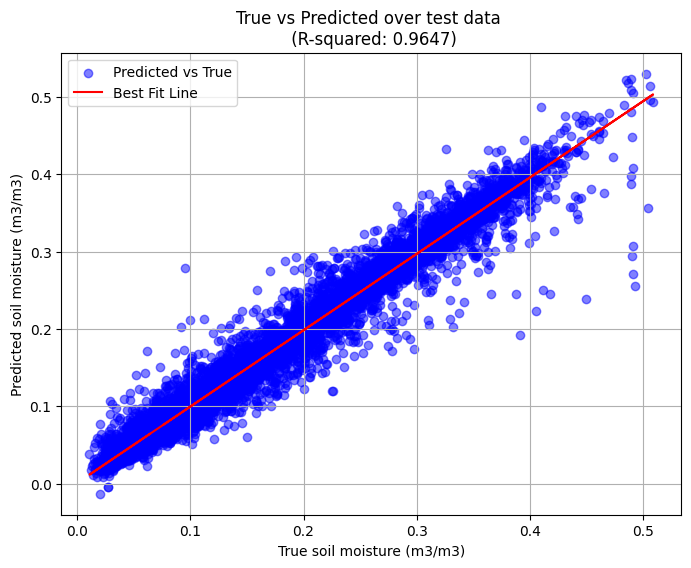

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
import torch

# Evaluation loop with R-squared calculation and plotting
def evaluate_model_with_r2_and_plots(model, dataloader, criterion):
    model.eval()
    eval_loss = 0.0
    all_targets = []
    all_outputs = []

    with torch.no_grad():
        for inputs, targets in dataloader:
            # Convert inputs and targets to tensors and move to GPU
            inputs = torch.tensor(inputs).float().cuda()
            targets = torch.tensor(targets).float().cuda()

            # Ensure inputs have the correct number of channels
            if inputs.shape[1] == 1:  # If input has 1 channel, expand it to 2 channels
                inputs = inputs.repeat(1, 2, 1, 1)

            outputs = model(inputs)
            loss = criterion(outputs, targets)

            eval_loss += loss.item() * inputs.size(0)

            all_targets.append(targets.cpu().numpy())
            all_outputs.append(outputs.cpu().numpy())

    eval_loss /= len(dataloader.dataset)
    print(f'Evaluation Loss: {eval_loss:.4f}')

    # Concatenate all batches
    all_targets = np.concatenate(all_targets, axis=0).reshape(-1)
    all_outputs = np.concatenate(all_outputs, axis=0).reshape(-1)

    # Calculate R-squared
    r2 = r2_score(all_targets, all_outputs)
    print(f'R-squared: {r2:.4f}')

    # Plot scatter plot with best fit line
    plot_results(all_targets, all_outputs)

    return eval_loss, r2

# Function to create scatter plot with best fit line
def plot_results(true_values, predicted_values):
    plt.figure(figsize=(8, 6))

    # Scatter plot
    plt.scatter(true_values, predicted_values, color='blue', label='Predicted vs True', alpha=0.5)

    # Best fit line
    best_fit_line = np.poly1d(np.polyfit(true_values, predicted_values, 1))
    plt.plot(true_values, best_fit_line(true_values), color='red', label='Best Fit Line')

    # Plot labels
    plt.xlabel('True soil moisture (m3/m3)')
    plt.ylabel('Predicted soil moisture (m3/m3)')
    plt.title('True vs Predicted over test data \n (R-squared: 0.9647)')
    plt.legend()

    # Show plot
    plt.grid(True)
    plt.savefig('best_fit.png', dpi=500)

# Assuming test_loader is already defined
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Instantiate and run the evaluation with plots
evaluate_model_with_r2_and_plots(model, test_loader, criterion)


In [36]:
!mv best_fit.png fig3_best_fit.png

# Generate Predictions

In [37]:
incomplete_data = ds_cygnss_tx.isel(time=110).data
incomplete_data.shape

(252, 802)

In [38]:
incomplete_data = ds_cygnss_tx.isel(time=110).data[:248, :800]
print(incomplete_data[np.newaxis].shape, np.sum(np.isnan(incomplete_data[np.newaxis])))

scaled_incomplete_data = 2 * (incomplete_data - scaler_params['min']) / (scaler_params['max'] - scaler_params['min'])
scaled_incomplete_data = scaled_incomplete_data#.compute()

print(scaled_incomplete_data.shape)
# Create mask and impute data
masks = np.array([create_mask(img) for img in scaled_incomplete_data])
incomplete_data = np.array([impute_data(img) for img in scaled_incomplete_data])
print(masks.shape)
# Combine the imputed data and the mask into a two-channel input
combined_data = np.concatenate((incomplete_data[np.newaxis], masks[np.newaxis]), axis=0)
print(combined_data.shape)

gap_filled = model(torch.tensor(combined_data[np.newaxis]).float().cuda()).cpu().detach().numpy()[0,0]
gap_filled.shape

(1, 248, 800) 166519
(248, 800)
(248, 800)
(2, 248, 800)


<ipython-input-22-3b499f450870>:36: RuntimeWarning: Mean of empty slice
  mean_value = np.nanmean(data)


(248, 800)

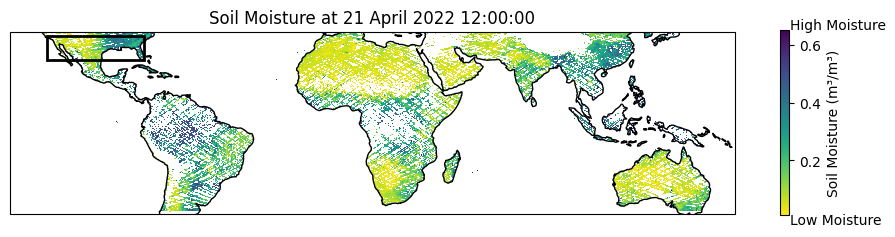

In [39]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Rectangle

# Create the plot with Cartopy projection
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(11.69, 4), subplot_kw={'projection': ccrs.PlateCarree()})
sm_plot = ds_cygnss_.SM_daily.isel(time=110).isel(lat=slice(0,248)).isel(lon=slice(0,800)).plot(ax=ax, cmap='viridis_r', cbar_kwargs={'shrink': 0.6, 'label': 'Soil Moisture (m³/m³)'})

# Add coastlines
ax.coastlines()

# Add title
ax.set_title('Soil Moisture at 21 April 2022 12:00:00')

# Add black box (lat = slice(25, 35), lon = slice(-120, -90))
lon_min, lon_max = -120, -80
lat_min, lat_max = 25, 35

# Create a Rectangle for the box (black border, no fill)
box = Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min,
                linewidth=2, edgecolor='black', facecolor='none', transform=ccrs.PlateCarree())

# Add the rectangle to the plot
ax.add_patch(box)

# Modify colorbar and add text
cbar = sm_plot.colorbar
cbar.set_label('Soil Moisture (m³/m³)', fontsize=10)
cbar.ax.text(1.05, 0.5, 'High Moisture\n\n\n\n\n\n\n\n\n\n\n\nLow Moisture', transform=cbar.ax.transAxes, va='center')

# Save the figure
plt.savefig('fig1_gaps_1.png', dpi=500)

In [40]:
ds_cygnss_gap_fill = ds_cygnss_tx.isel(time=110).isel(lat=slice(0,248)).isel(lon=slice(0,800))
ds_cygnss_gap_fill['SM_daily_gap_filled'] = (('lat', 'lon'), gap_filled)
ds_cygnss_gap_fill

<xarray.DataArray 'SM_daily' (lat: 248, lon: 800)> Size: 794kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    time                 datetime64[ns] 8B 2022-04-21T12:00:00
  * lat                  (lat) float32 992B -38.14 -37.79 -37.43 ... 36.38 36.73
  * lon                  (lon) float32 3kB -135.0 -134.6 -134.3 ... 163.0 163.4
    SM_daily_gap_filled  (lat, lon) float32 794kB nan nan nan ... 0.2705 0.2405
Attributes:
    comment:                units represent soil moisture content as a fracti...
    long_name:              mean soil moisture retrieval during the daily tim...
    units:                  1
    coverage_content_type:  modelResult

In [41]:
mask = ds_cygnss_.SM_daily.mean(dim='time').isel(lat=slice(0,248)).isel(lon=slice(0,800)).values
mask = mask/mask
mask

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [42]:
ds_cygnss_gap_fill_mask = ds_cygnss_gap_fill.SM_daily_gap_filled*mask
ds_cygnss_gap_fill_mask = ds_cygnss_gap_fill_mask*(scaler_params['max'] - scaler_params['min'])/2 + scaler_params['min']
ds_cygnss_gap_fill_mask = ((ds_cygnss_gap_fill_mask - ds_cygnss_gap_fill_mask.mean())/ds_cygnss_gap_fill_mask.std()) *ds_cygnss_.SM_daily.isel(lat=slice(0,248)).isel(lon=slice(0,800)).std() + ds_cygnss_.SM_daily.isel(lat=slice(0,248)).isel(lon=slice(0,800)).mean()
ds_cygnss_gap_fill_mask

<xarray.DataArray (lat: 248, lon: 800)> Size: 2MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    time                 datetime64[ns] 8B 2022-04-21T12:00:00
  * lat                  (lat) float32 992B -38.14 -37.79 -37.43 ... 36.38 36.73
  * lon                  (lon) float32 3kB -135.0 -134.6 -134.3 ... 163.0 163.4
    SM_daily_gap_filled  (lat, lon) float32 794kB nan nan nan ... 0.2705 0.2405

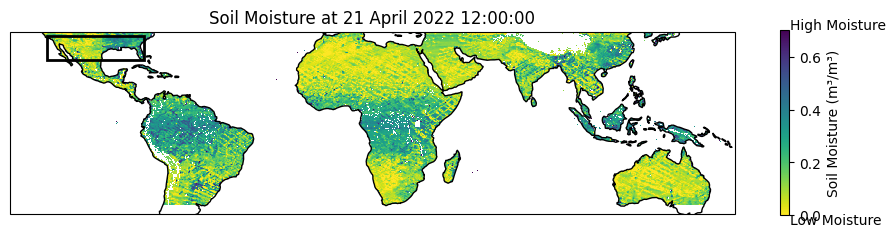

In [43]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Rectangle

# Create the plot with Cartopy projection
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(11.69, 4), subplot_kw={'projection': ccrs.PlateCarree()})
sm_plot = ds_cygnss_gap_fill_mask.plot(ax=ax, cmap='viridis_r', cbar_kwargs={'shrink': 0.6, 'label': 'Soil Moisture (m³/m³)'}, vmin=0,vmax=0.7, extend='neither')

# Add coastlines
ax.coastlines()

# Add title
ax.set_title('Soil Moisture at 21 April 2022 12:00:00')

# Add black box (lat = slice(25, 35), lon = slice(-120, -90))
lon_min, lon_max = -120, -80
lat_min, lat_max = 25, 35

# Create a Rectangle for the box (black border, no fill)
box = Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min,
                linewidth=2, edgecolor='black', facecolor='none', transform=ccrs.PlateCarree())

# Add the rectangle to the plot
ax.add_patch(box)

# Modify colorbar and add text
cbar = sm_plot.colorbar
cbar.set_label('Soil Moisture (m³/m³)', fontsize=10)
cbar.ax.text(1.05, 0.5, 'High Moisture\n\n\n\n\n\n\n\n\n\n\n\nLow Moisture', transform=cbar.ax.transAxes, va='center')

# Save the figure
plt.savefig('fig4_gap_filled_1.png', dpi=500)

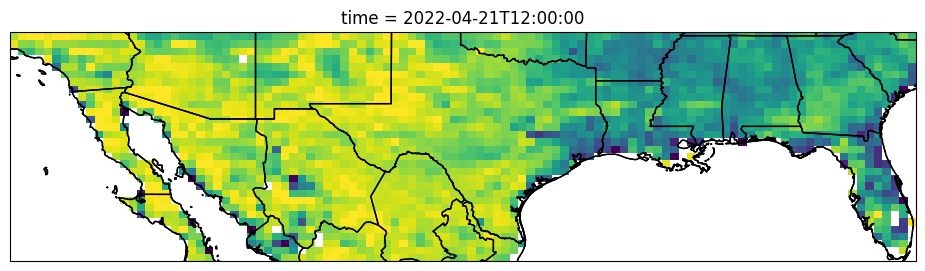

In [44]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(11.69, 8), subplot_kw={'projection': ccrs.PlateCarree()})
sm_plot = ds_cygnss_gap_fill_mask.sel(lat=slice(25,35)).sel(lon=slice(-120,-80)).plot(ax=ax, cmap='viridis_r', add_colorbar=False, vmin=0, vmax=0.7)

ax.coastlines()
ax.add_feature(cfeature.STATES.with_scale('10m'))  # Add state borders
ax.add_feature(cfeature.BORDERS, linestyle=':')

plt.savefig('fig4_gap_filled_2.png', dpi=500)

In [45]:
import numpy as np
import xarray as xr
import torch
from tqdm import tqdm

# Helper functions (reuse from before)
def create_mask(data):
    return (~np.isnan(data)).astype(np.float32)

def impute_data(data):
    data = data.copy()
    nan_mask = np.isnan(data)
    data[nan_mask] = np.nanmean(data)
    return data

# Subset CYGNSS data (adjust region if needed)
lat_slice = slice(0, 248)
lon_slice = slice(0, 800)
ds_crop = ds_cygnss_tx.isel(lat=lat_slice, lon=lon_slice)

# Initialize empty list for results
gap_filled_all = []

# Loop over time dimension
for t in tqdm(range(ds_crop.shape[0]), desc="Gap-filling over time"):
    # Extract soil moisture at time t
    incomplete_data = ds_crop.isel(time=t).values

    # Skip if fully missing
    if np.isnan(incomplete_data).all():
        gap_filled_all.append(np.full_like(incomplete_data, np.nan))
        continue

    # Scale
    scaled = 2 * (incomplete_data - scaler_params['min']) / (scaler_params['max'] - scaler_params['min'])

    # Mask and impute
    mask = create_mask(scaled)
    scaled = impute_data(scaled)

    # Stack as 2-channel input
    combined = np.stack([scaled, mask], axis=0)  # Shape: [2, H, W]

    # Model prediction
    with torch.no_grad():
        input_tensor = torch.tensor(combined[np.newaxis]).float().cuda()  # Shape: [1, 2, H, W]
        output_tensor = model(input_tensor).cpu().numpy()[0, 0]  # Shape: [H, W]

    # Append output
    gap_filled_all.append(output_tensor)

# Convert to numpy array
gap_filled_all = np.array(gap_filled_all)  # Shape: [time, lat, lon]

# Create xarray DataArray
ds_gap_filled = xr.DataArray(
    gap_filled_all,
    dims=['time', 'lat', 'lon'],
    coords={
        'time': ds_crop.time.values,
        'lat': ds_crop.lat.values,
        'lon': ds_crop.lon.values
    },
    name="SM_daily_gap_filled"
)

# Optional: save to NetCDF
ds_gap_filled.to_netcdf("cygnss_gap_filled_all.nc")
print("Gap-filled data saved to 'cygnss_gap_filled_all.nc'")

Gap-filling over time: 100%|██████████| 360/360 [00:03<00:00, 109.17it/s]


Gap-filled data saved to 'cygnss_gap_filled_all.nc'


In [50]:
import xarray as xr
import numpy as np

# Subset and crop the data (same region as deep learning gap-fill)
lat_slice = slice(0, 248)
lon_slice = slice(0, 800)
ds_interp_input = ds_cygnss_tx.isel(lat=lat_slice, lon=lon_slice)

# Apply linear interpolation along the time dimension
ds_linear_interp = ds_interp_input.interpolate_na(
    dim="time",
    method="linear",
    fill_value="extrapolate"  # Optional: extrapolates at edges
)

# Rename for consistency
ds_linear_interp.name = "SM_daily_linear_interp"

# Save the result
ds_linear_interp.to_netcdf("cygnss_gap_filled_linear.nc")
print("Linear interpolation gap-filled data saved to 'cygnss_gap_filled_linear.nc'")

Linear interpolation gap-filled data saved to 'cygnss_gap_filled_linear.nc'


In [52]:
!pip install scikit-image

In [57]:
import numpy as np
import xarray as xr
from sklearn.metrics import mean_squared_error, mean_absolute_error
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

# Define the region of interest (Texas in this case)
lat_slice = slice(25, 35)
lon_slice = slice(-105, -93)

# Extract observed (original), DL gap-filled, and Linear interpolated datasets
obs = ds_cygnss_tx.sel(lat=lat_slice, lon=lon_slice)
dl = ds_gap_filled.sel(lat=lat_slice, lon=lon_slice)
li = ds_linear_interp.sel(lat=lat_slice, lon=lon_slice)

# Align all three over time
obs, dl, li = xr.align(obs, dl, li)

# Initialize metric maps
lat_size = obs.sizes['lat']
lon_size = obs.sizes['lon']

rmse_dl_map = np.full((lat_size, lon_size), np.nan)
mae_dl_map = np.full((lat_size, lon_size), np.nan)
ssim_dl_map = np.full((lat_size, lon_size), np.nan)

rmse_li_map = np.full((lat_size, lon_size), np.nan)
mae_li_map = np.full((lat_size, lon_size), np.nan)
ssim_li_map = np.full((lat_size, lon_size), np.nan)

# Loop over each grid point
for i in range(lat_size):
    for j in range(lon_size):
        obs_series = obs[:, i, j].values
        dl_series = dl[:, i, j].values
        li_series = li[:, i, j].values

        # Only evaluate at times where observations exist
        mask = ~np.isnan(obs_series)
        if np.sum(mask) < 10:
            continue

        obs_valid = obs_series[mask]
        dl_valid = dl_series[mask]
        li_valid = li_series[mask]

        # Skip if DL or LI has NaNs (could happen at edge or masked regions)
        if np.isnan(dl_valid).any() or np.isnan(li_valid).any():
            continue

        # DL metrics
        rmse_dl_map[i, j] = np.sqrt(mean_squared_error(obs_valid, dl_valid))
        mae_dl_map[i, j] = mean_absolute_error(obs_valid, dl_valid)
        try:
            ssim_dl_map[i, j] = ssim(obs_valid.reshape(-1, 1), dl_valid.reshape(-1, 1), data_range=obs_valid.max() - obs_valid.min())
        except:
            pass

        # LI metrics
        rmse_li_map[i, j] = np.sqrt(mean_squared_error(obs_valid, li_valid))
        mae_li_map[i, j] = mean_absolute_error(obs_valid, li_valid)
        try:
            ssim_li_map[i, j] = ssim(obs_valid.reshape(-1, 1), li_valid.reshape(-1, 1), data_range=obs_valid.max() - obs_valid.min())
        except:
            pass

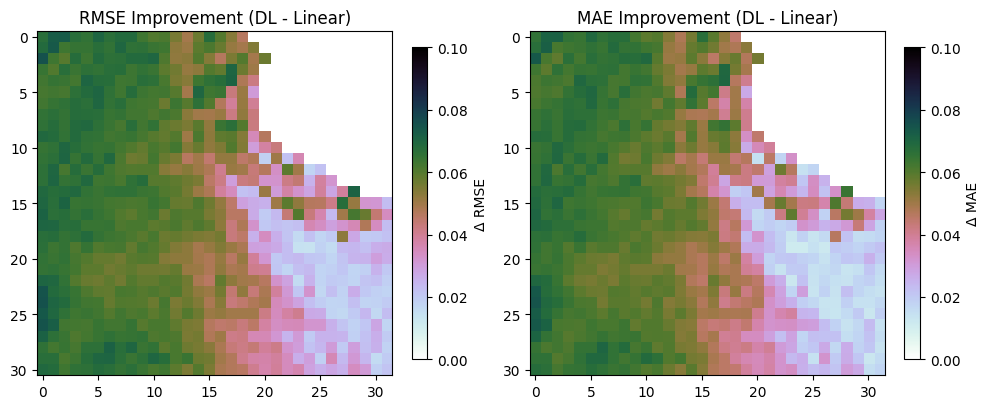

In [65]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# RMSE improvement (DL - Linear)
diff_rmse = (rmse_li_map - rmse_dl_map) * -1  # Positive = DL is better
im1 = axs[0].imshow(diff_rmse, cmap='cubehelix_r', vmin=0.0, vmax=0.1)
axs[0].set_title('RMSE Improvement (DL - Linear)')
plt.colorbar(im1, ax=axs[0], fraction=0.04, label='Δ RMSE')

# MAE improvement (DL - Linear)
diff_mae = (mae_li_map - mae_dl_map) * -1
im2 = axs[1].imshow(diff_mae, cmap='cubehelix_r', vmin=0.0, vmax=0.1)
axs[1].set_title('MAE Improvement (DL - Linear)')
plt.colorbar(im2, ax=axs[1], fraction=0.04, label='Δ MAE')

plt.tight_layout()
plt.savefig("fig7_dl_vs_linear_vs_observed_metrics.png", dpi=500)

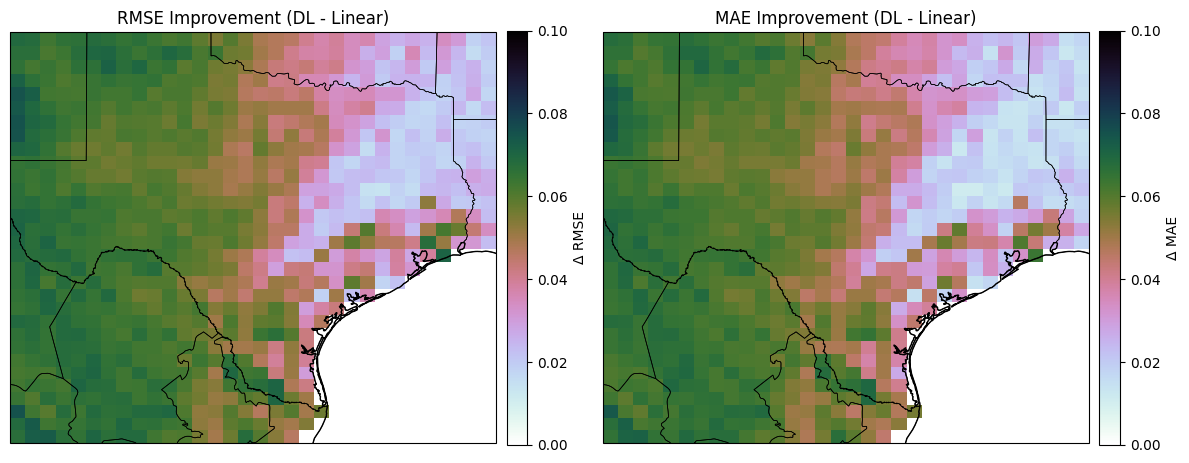

In [135]:
lat = obs.lat.values
lon = obs.lon.values

# Now construct the xarray DataArrays using lat/lon
da_rmse = xr.DataArray(diff_rmse, coords=[('lat', lat), ('lon', lon)])
da_mae = xr.DataArray(diff_mae, coords=[('lat', lat), ('lon', lon)])

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Get lat/lon from obs grid
lat = obs.lat.values
lon = obs.lon.values

# Compute improvement
diff_rmse = (rmse_li_map - rmse_dl_map) * -1
diff_mae = (mae_li_map - mae_dl_map) * -1

# Wrap into xarray
da_rmse = xr.DataArray(diff_rmse, coords=[('lat', lat), ('lon', lon)])
da_mae = xr.DataArray(diff_mae, coords=[('lat', lat), ('lon', lon)])

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

im1 = da_rmse.plot(ax=axs[0], cmap='cubehelix_r', vmin=0.0, vmax=0.1, add_colorbar=False)
axs[0].set_title('RMSE Improvement (DL - Linear)')
axs[0].coastlines()
axs[0].add_feature(cfeature.STATES, linewidth=0.5)
axs[0].add_feature(cfeature.BORDERS, linestyle=':')

im2 = da_mae.plot(ax=axs[1], cmap='cubehelix_r', vmin=0.0, vmax=0.1, add_colorbar=False)
axs[1].set_title('MAE Improvement (DL - Linear)')
axs[1].coastlines()
axs[1].add_feature(cfeature.STATES, linewidth=0.5)
axs[1].add_feature(cfeature.BORDERS, linestyle=':')

fig.colorbar(im1, ax=axs[0], orientation='vertical', fraction=0.04, pad=0.02, label='Δ RMSE')
fig.colorbar(im2, ax=axs[1], orientation='vertical', fraction=0.04, pad=0.02, label='Δ MAE')

plt.tight_layout()
plt.savefig("fig7_dl_vs_linear_vs_observed_metrics.png", dpi=500, bbox_inches='tight')
plt.show()

In [72]:
# Central Texas drought grid (near Travis County)
lat_drought, lon_drought = 30.3, -97.8

# DFW flood grid (near Dallas)
lat_flood, lon_flood = 32.8, -96.8

In [74]:
# Dates to visualize
event_dates = {
    "Drought_July15": "2022-07-15",
    "Flood_Aug22": "2022-08-22"
}

In [83]:
!pip install cartopy

In [84]:
import cartopy.crs as ccrs

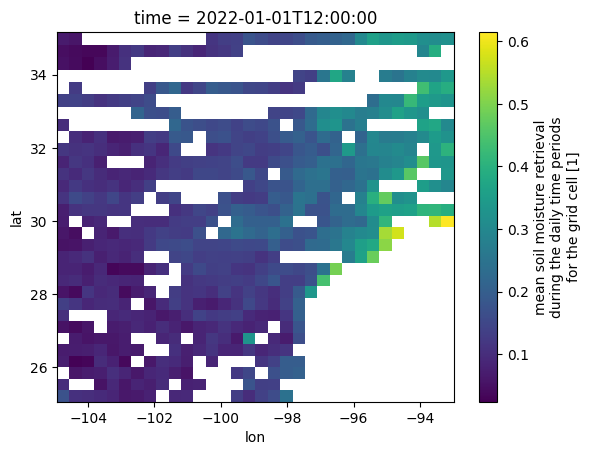

In [113]:
obs.isel(time=0).plot()

In [120]:
mask = obs.mean(dim='time').values
mask = mask/mask
mask

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1., nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1., nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1., nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1., nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
  

In [110]:
ds_cygnss_gap_fill_final = xr.open_dataset('cygnss_gap_filled_all.nc')

In [115]:
obs

<xarray.DataArray 'SM_daily' (time: 360, lat: 31, lon: 32)> Size: 1MB
array([[[0.17282172, 0.10677953, 0.09998017, ...,        nan,
                nan,        nan],
        [0.09763184,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan, 0.05690542, 0.06908599, ...,        nan,
                nan,        nan],
        ...,
        [0.0495064 , 0.04074128, 0.02374071, ...,        nan,
                nan,        nan],
        [0.04680497, 0.03953968, 0.03390655, ..., 0.294771  ,
         0.38873288,        nan],
        [0.06561837, 0.05833703,        nan, ..., 0.31498757,
         0.31073517, 0.31847593]],

       [[       nan, 0.1187866 , 0.07842803, ...,        nan,
                nan,        nan],
        [0.08966997, 0.05844343, 0.05773357, ...,        nan,
                nan,        nan],
        [0.10128325, 0.06714807,        nan, ...,        nan,
                nan,        nan],
...
        [       nan,        nan,        nan, ..., 0.30785176,
         0.36155513, 0.40475845],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ..., 0.28684017,
         0.33965173, 0.35877475]],

       [[0.17062363, 0.08910783, 0.08385277, ...,        nan,
                nan,        nan],
        [       nan, 0.07862744, 0.0920056 , ...,        nan,
                nan,        nan],
        [0.08699363, 0.05127537,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ..., 0.24178925,
         0.38094625, 0.40376106],
        [       nan,        nan, 0.08295673, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ..., 0.27071264,
         0.31280124, 0.3380334 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 3kB 2022-01-01T12:00:00 ... 2022-12-29T12:...
  * lat      (lat) float32 124B 25.22 25.53 25.84 26.16 ... 34.31 34.65 34.99
  * lon      (lon) float32 128B -104.8 -104.4 -104.0 ... -93.92 -93.55 -93.17
Attributes:
    comment:                units represent soil moisture content as a fracti...
    long_name:              mean soil moisture retrieval during the daily tim...
    units:                  1
    coverage_content_type:  modelResult

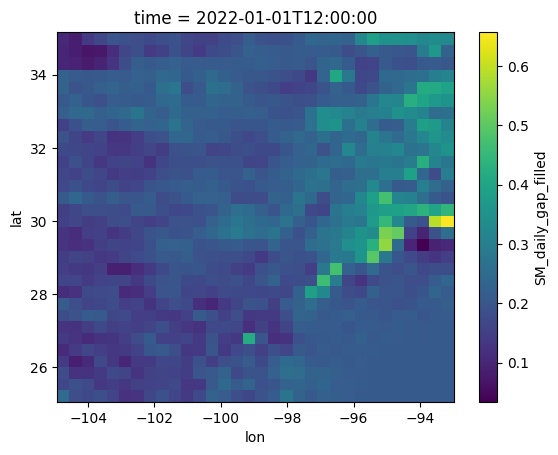

In [116]:
ds_cygnss_gap_fill_final.SM_daily_gap_filled.sel(lat =slice(obs.lat.values[0], obs.lat.values[-1])).sel(lon =slice(obs.lon.values[0], obs.lon.values[-1])).isel(time=0).plot()

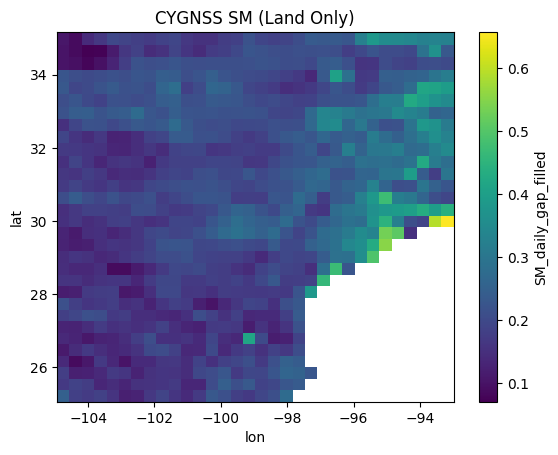

In [121]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Extract the first time step
sm_data = ds_cygnss_gap_fill_final.SM_daily_gap_filled.sel(
    lat=slice(obs.lat.values[0], obs.lat.values[-1]),
    lon=slice(obs.lon.values[0], obs.lon.values[-1])
).isel(time=0)

# Assume you have land_mask as 2D (lat, lon), same shape as sm_data
# Apply the mask: set ocean (mask==0) to NaN
masked_sm = sm_data.where(mask == 1)

# Plot
masked_sm.plot()
plt.title("CYGNSS SM (Land Only)")
plt.show()

In [122]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Define event dates (can be extended)
event_dict = {
    "Drought_July15": "2022-07-15",
    "Flood_Aug20": "2022-08-20",
    "Drought_Sept01": "2022-09-01"
}

# Directory to save figures
output_dir = "./cygnss_event_maps/"
import os
os.makedirs(output_dir, exist_ok=True)

for event_name, date_str in event_dict.items():
    # Get data
    sm_data = ds_cygnss_gap_fill_final.SM_daily_gap_filled.sel(
        lat=slice(obs.lat.values[0], obs.lat.values[-1]),
        lon=slice(obs.lon.values[0], obs.lon.values[-1]),
        time=date_str
    )

    # Apply land mask
    masked_sm = sm_data.where(mask == 1)

    # Plot with Cartopy
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    im = masked_sm.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="YlGnBu", cbar_kwargs={"label": "Soil Moisture"})

    # Add features
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.STATES, linewidth=0.5)
    ax.set_title(f"CYGNSS SM during {event_name.replace('_', ' ')}", fontsize=14)

    # Save
    filepath = os.path.join(output_dir, f"{event_name}.png")
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.close()

    print(f"Saved: {filepath}")

Saved: ./cygnss_event_maps/Drought_July15.png
Saved: ./cygnss_event_maps/Flood_Aug20.png
Saved: ./cygnss_event_maps/Drought_Sept01.png


<ipython-input-126-678dc2f998bf>:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


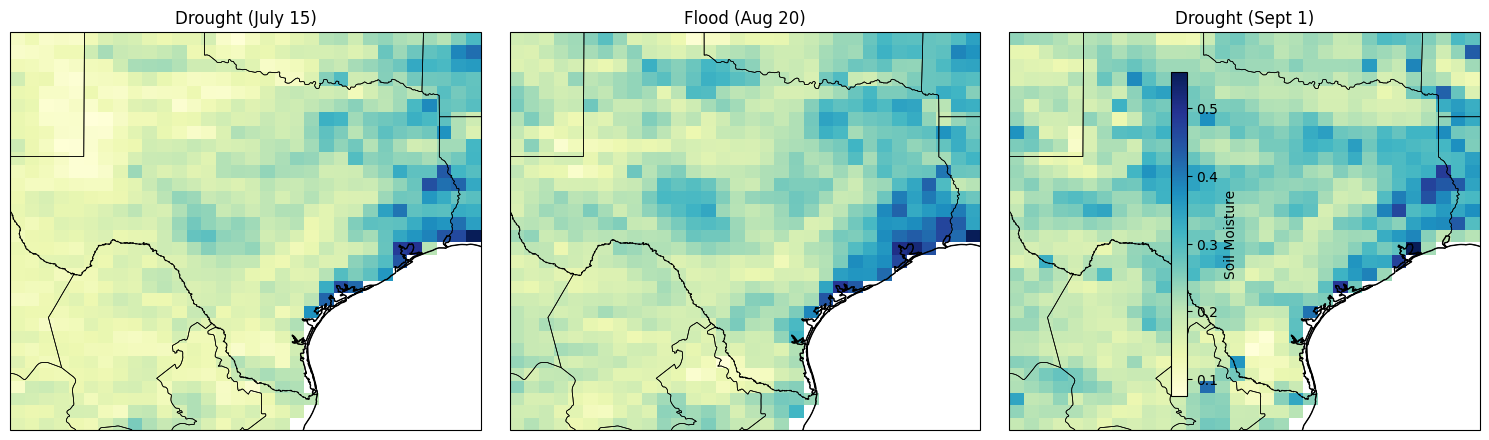

In [126]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Define event dates and titles
event_dict = {
    "2022-07-15": "Drought (July 15)",
    "2022-08-20": "Flood (Aug 20)",
    "2022-09-01": "Drought (Sept 1)"
}

# Create figure
n_events = len(event_dict)
fig, axs = plt.subplots(1, n_events, figsize=(5 * n_events, 6),
                        subplot_kw={'projection': ccrs.PlateCarree()})

if n_events == 1:
    axs = [axs]  # ensure it's iterable if only one subplot

# Loop over events
for ax, (date_str, title) in zip(axs, event_dict.items()):
    sm_data = ds_cygnss_gap_fill_final.SM_daily_gap_filled.sel(
        lat=slice(obs.lat.values[0], obs.lat.values[-1]),
        lon=slice(obs.lon.values[0], obs.lon.values[-1]),
        time=date_str
    )
    masked_sm = sm_data.where(mask == 1)


    im = masked_sm.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="YlGnBu",
                            add_colorbar=False)  # suppress colorbar per plot
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.STATES, linewidth=0.5)
    ax.set_title(f"{title}", fontsize=12)

# Add a shared colorbar
cbar = fig.colorbar(im, ax=axs, orientation='vertical', shrink=0.7, label="Soil Moisture")

# Save and show
plt.tight_layout()
plt.savefig("CYGNSS_SM_Events_2022.png", dpi=300)
plt.show()

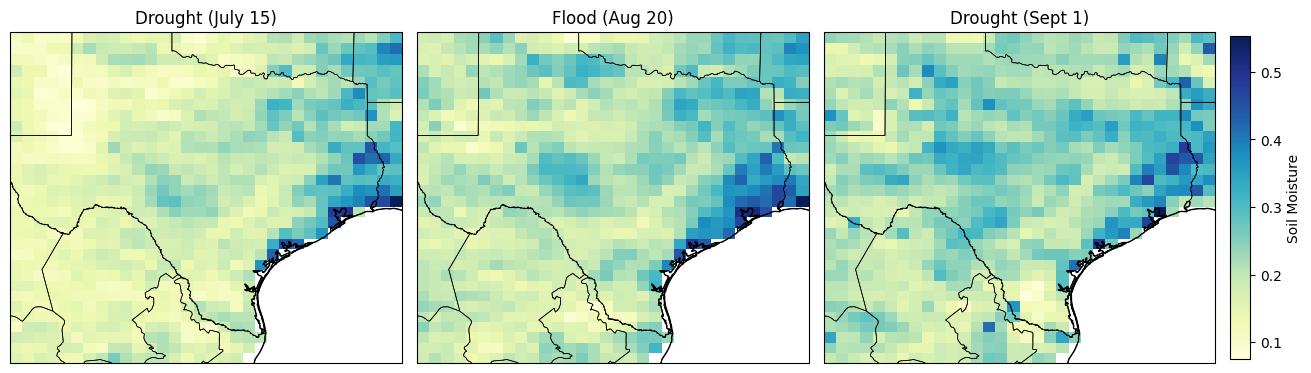

In [130]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Define event dates and titles
event_dict = {
    "2022-07-15": "Drought (July 15)",
    "2022-08-20": "Flood (Aug 20)",
    "2022-09-01": "Drought (Sept 1)"
}

# Set up figure with space on right for colorbar
n_events = len(event_dict)
fig = plt.figure(figsize=(5 * n_events + 1, 6))
gs = gridspec.GridSpec(1, n_events + 1, width_ratios=[1]*n_events + [0.05], wspace=0.05)

axs = []
for i in range(n_events):
    ax = fig.add_subplot(gs[0, i], projection=ccrs.PlateCarree())
    axs.append(ax)

# Plot each event
for ax, (date_str, title) in zip(axs, event_dict.items()):
    sm_data = ds_cygnss_gap_fill_final.SM_daily_gap_filled.sel(
        lat=slice(obs.lat.values[0], obs.lat.values[-1]),
        lon=slice(obs.lon.values[0], obs.lon.values[-1]),
        time=date_str
    )
    masked_sm = sm_data.where(mask == 1)

    im = masked_sm.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="YlGnBu",
                        add_colorbar=False)
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.STATES, linewidth=0.5)
    ax.set_title(title, fontsize=12)

# Add vertical colorbar with shorter height
cax = fig.add_subplot(gs[0, -1])
pos = cax.get_position()
# Shrink to 70% of original height and center
cax.set_position([pos.x0, pos.y0 + pos.height * 0.15, pos.width, pos.height * 0.7])

cbar = fig.colorbar(im, cax=cax, orientation='vertical')
cbar.set_label("Soil Moisture")

# Save and show
plt.savefig("CYGNSS_SM_Events_2022.png", dpi=300, bbox_inches='tight')
plt.show()

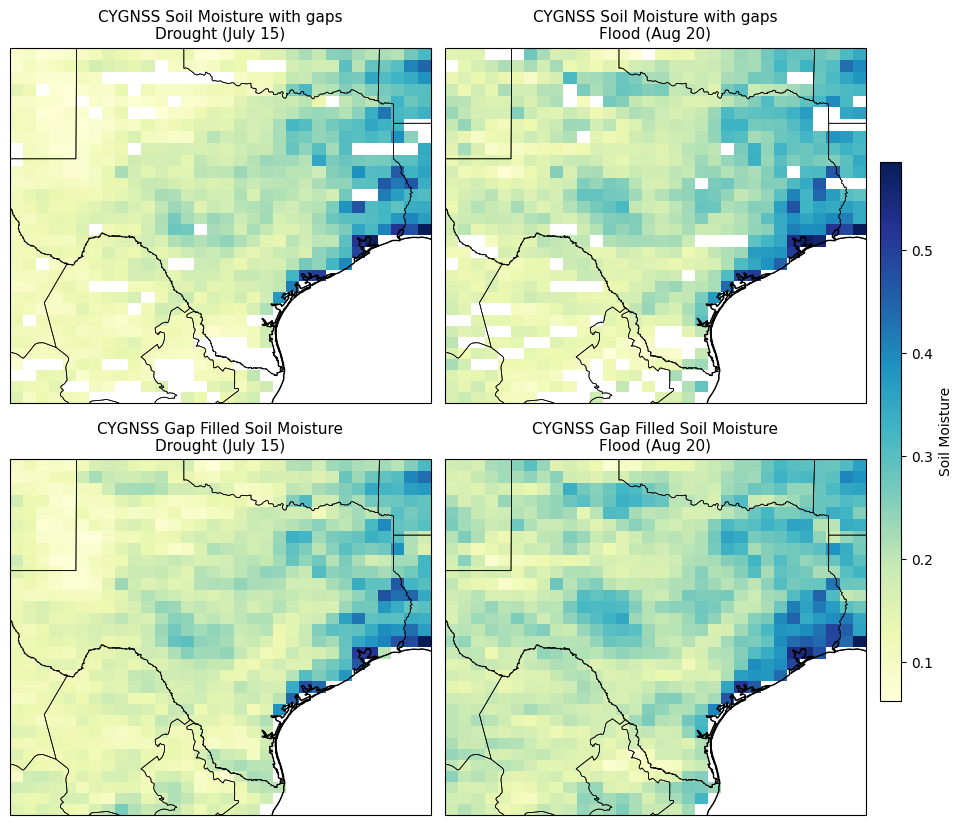

In [132]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Define event dates and titles
event_dict = {
    "2022-07-15": "Drought (July 15)",
    "2022-08-20": "Flood (Aug 20)"
}

n_events = len(event_dict)

# Create 2-row grid: Row 1 = OBS, Row 2 = CYGNSS
fig = plt.figure(figsize=(5 * n_events + 1.5, 10))
gs = gridspec.GridSpec(2, n_events + 1, width_ratios=[1]*n_events + [0.05], hspace=0.15, wspace=0.05)

axs_obs = []
axs_dl = []

# Plot observations (top row)
for i, (date_str, title) in enumerate(event_dict.items()):
    ax = fig.add_subplot(gs[0, i], projection=ccrs.PlateCarree())
    axs_obs.append(ax)

    obs_data = obs.sel(time=date_str)
    im_obs = obs_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="YlGnBu",
                           add_colorbar=False)

    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.STATES, linewidth=0.5)
    ax.set_title(f"CYGNSS Soil Moisture with gaps\n{title}", fontsize=11)

# Plot CYGNSS (bottom row)
for i, (date_str, title) in enumerate(event_dict.items()):
    ax = fig.add_subplot(gs[1, i], projection=ccrs.PlateCarree())
    axs_dl.append(ax)

    sm_data = ds_cygnss_gap_fill_final.SM_daily_gap_filled.sel(
        lat=slice(obs.lat.values[0], obs.lat.values[-1]),
        lon=slice(obs.lon.values[0], obs.lon.values[-1]),
        time=date_str
    )
    masked_sm = sm_data.where(mask == 1)

    im_dl = masked_sm.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="YlGnBu",
                           add_colorbar=False)

    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.STATES, linewidth=0.5)
    ax.set_title(f"CYGNSS Gap Filled Soil Moisture\n{title}", fontsize=11)

# Colorbar outside
cax = fig.add_subplot(gs[:, -1])
pos = cax.get_position()
cax.set_position([pos.x0, pos.y0 + pos.height * 0.15, pos.width, pos.height * 0.7])
cbar = fig.colorbar(im_dl, cax=cax, orientation='vertical')
cbar.set_label("Soil Moisture")

# Save and show
plt.savefig("Obs_vs_CYGNSS_SM_2022.png", dpi=300, bbox_inches='tight')
plt.show()